<a href="https://colab.research.google.com/github/ICYEZAGATORE/LinearRModel-Flutter/blob/main/task1_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile

zip_path = '/content/archive (1).zip'  # keep as is with space inside quotes

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("Extraction complete!")

# List extracted files
import os
print(os.listdir('/content/'))


Extraction complete!
['.config', 'DatasetAfricaMalaria.csv', 'archive (1).zip', 'sample_data']


In [4]:
import pandas as pd

file_path = '/content/DatasetAfricaMalaria.csv'
df = pd.read_csv(file_path)

# Show first few rows
df.head()


,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


Select columns and clean data

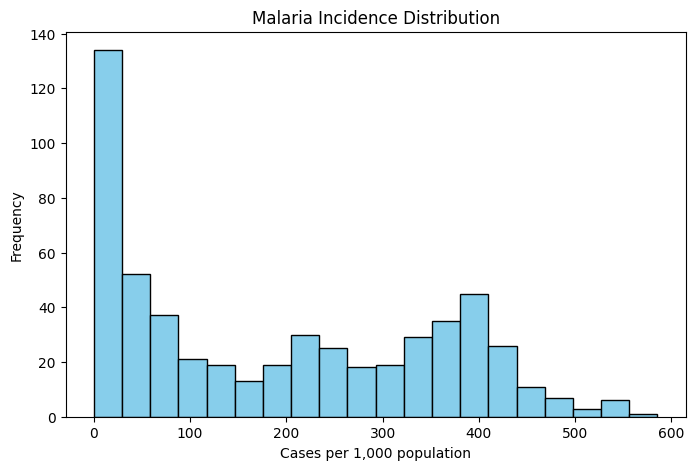

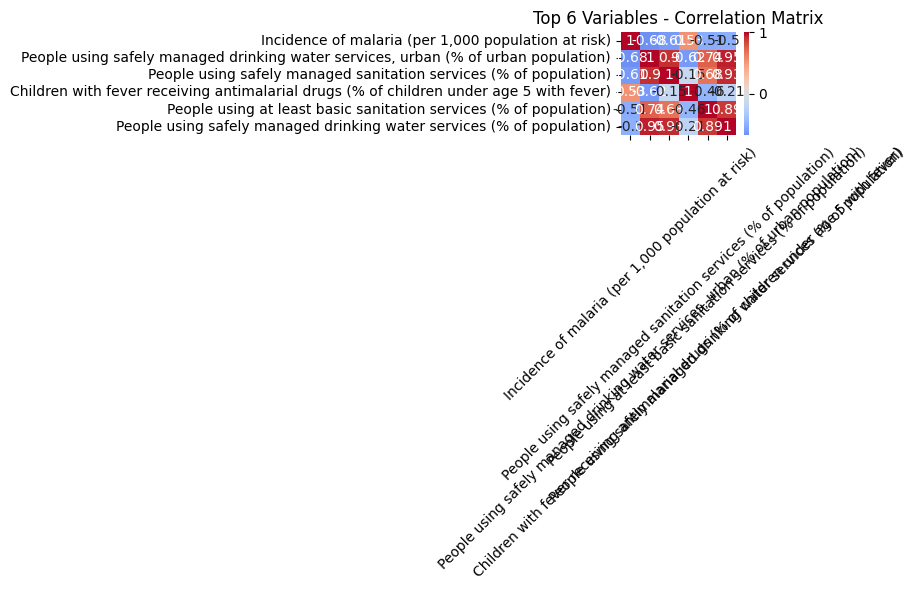

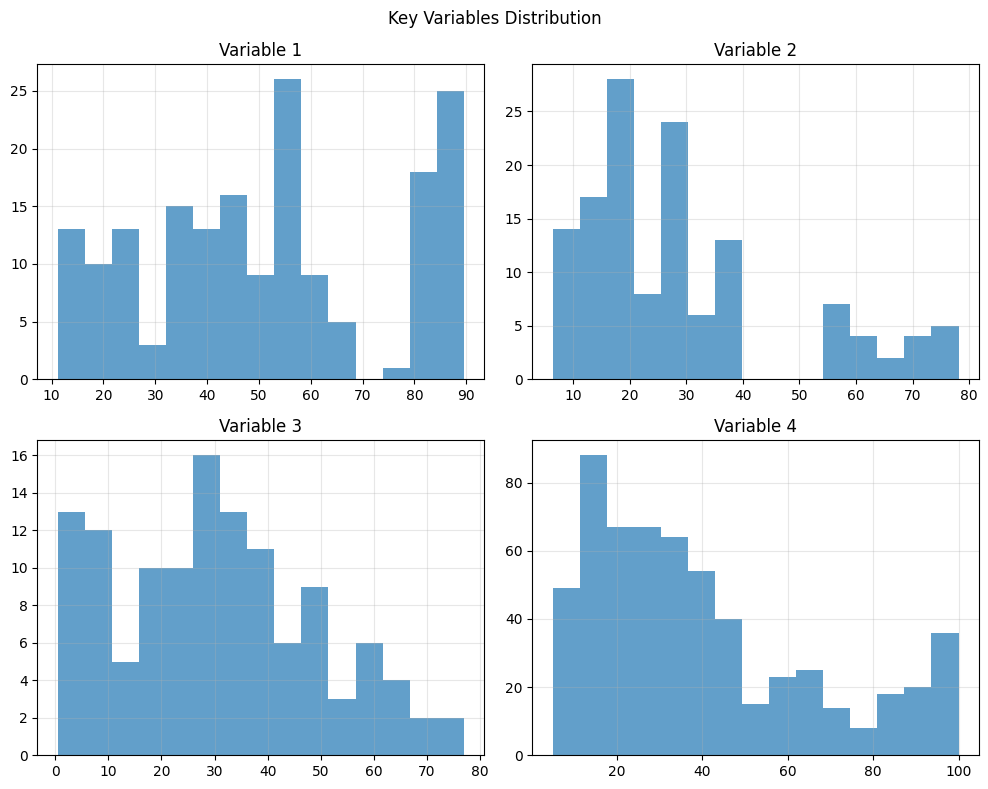

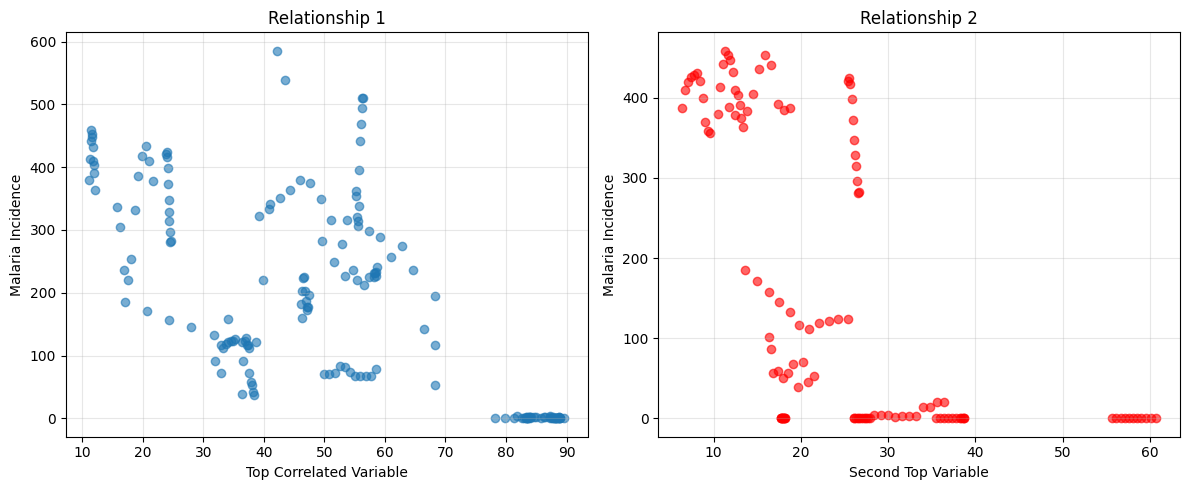

✅ Done! 4 clean visualizations created.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Target variable distribution
target_col = 'Incidence of malaria (per 1,000 population at risk)'
plt.figure(figsize=(8, 5))
plt.hist(df[target_col].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Malaria Incidence Distribution')
plt.xlabel('Cases per 1,000 population')
plt.ylabel('Frequency')
plt.show()

# 2. Simple correlation heatmap (top 6 variables only)
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corrwith(numeric_df[target_col]).abs().sort_values(ascending=False)
top_6 = correlations.head(6).index

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df[top_6].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Top 6 Variables - Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Distribution of top 4 features
other_vars = [v for v in top_6 if v != target_col][:4]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, var in enumerate(other_vars):
    axes[i].hist(df[var].dropna(), bins=15, alpha=0.7)
    axes[i].set_title(f'Variable {i+1}')
    axes[i].grid(alpha=0.3)

plt.suptitle('Key Variables Distribution')
plt.tight_layout()
plt.show()

# 4. Two scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
ax1.scatter(df[other_vars[0]], df[target_col], alpha=0.6)
ax1.set_xlabel('Top Correlated Variable')
ax1.set_ylabel('Malaria Incidence')
ax1.set_title('Relationship 1')
ax1.grid(alpha=0.3)

# Plot 2
ax2.scatter(df[other_vars[1]], df[target_col], alpha=0.6, color='red')
ax2.set_xlabel('Second Top Variable')
ax2.set_ylabel('Malaria Incidence')
ax2.set_title('Relationship 2')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Done! 4 clean visualizations created.")

In [16]:
from sklearn.preprocessing import StandardScaler

# Columns to use (features + target)
cols = [
    'Year',
    'Incidence of malaria (per 1,000 population at risk)',
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
    'People using safely managed drinking water services (% of population)'
]

df_selected = df[cols]

# Check missing values
print(df_selected.isnull().sum())

# Drop rows with missing data for simplicity (or you can use imputation)
df_clean = df_selected.dropna()

# Split into features and target
X = df_clean.drop('Incidence of malaria (per 1,000 population at risk)', axis=1)
y = df_clean['Incidence of malaria (per 1,000 population at risk)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


Year                                                                                         0
Incidence of malaria (per 1,000 population at risk)                                         44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
dtype: int64


,Year,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population)
0,-1.473577,-0.561795,-0.301571,0.572375,0.381663
1,-1.473577,-1.938291,-0.938221,-1.153000,-0.031470
2,-1.473577,-0.686931,-1.289028,-1.013857,-1.016771
3,-1.105183,-0.261468,0.776836,-0.192913,-1.079851
4,-0.736788,-0.474200,0.094711,-0.979071,0.017395


Splitting features (X) and target (y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


We will use SGDRegressor from scikit-learn to explicitly train with gradient descent.

In [18]:
from sklearn.linear_model import SGDRegressor
import numpy as np

# Initialize model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)

# Fit model on training data
sgd_model.fit(X_train, y_train)


SGDRegressor(random_state=42)

Train linear regression model
python
Copy code



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

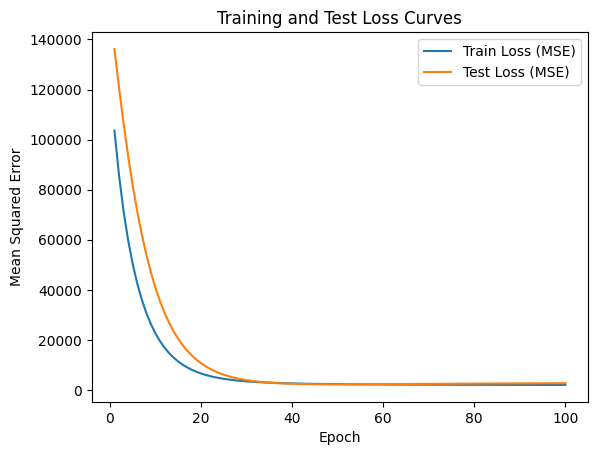

In [19]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

losses_train = []
losses_test = []

# Train epoch by epoch manually
sgd_model = SGDRegressor(max_iter=1, warm_start=True, learning_rate='invscaling', eta0=0.01, random_state=42)

epochs = 100
for epoch in range(epochs):
    sgd_model.fit(X_train, y_train)

    y_train_pred = sgd_model.predict(X_train)
    y_test_pred = sgd_model.predict(X_test)

    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    losses_train.append(train_loss)
    losses_test.append(test_loss)

# Plot loss curves
plt.plot(range(1, epochs+1), losses_train, label='Train Loss (MSE)')
plt.plot(range(1, epochs+1), losses_test, label='Test Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()


 Evaluate model

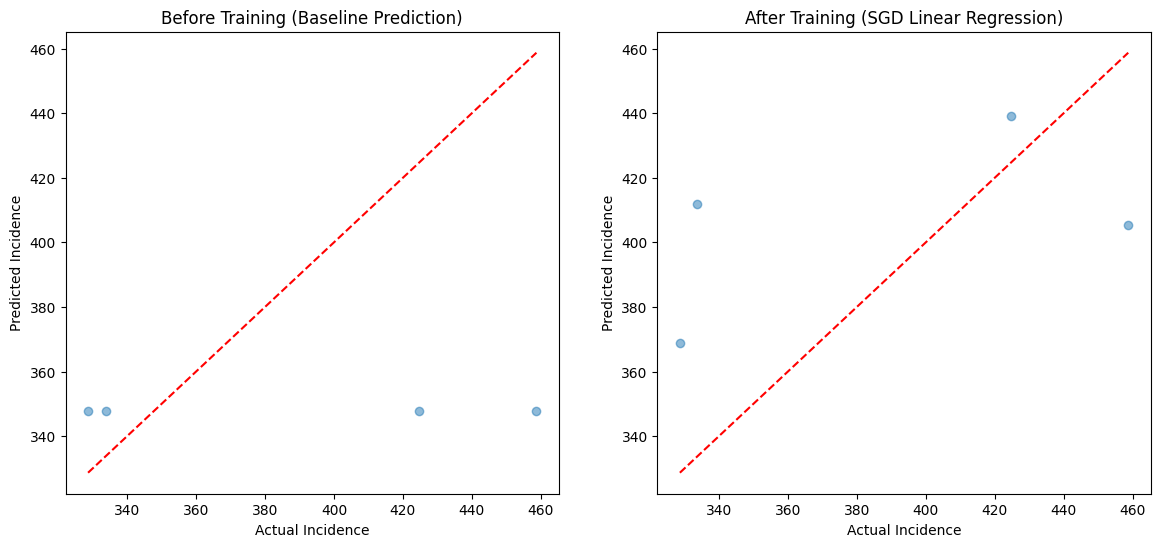

In [20]:
# Before training: use mean of y_train as baseline prediction
baseline_pred = np.mean(y_train)
y_test_baseline = np.full_like(y_test, baseline_pred)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_baseline, alpha=0.5)
plt.xlabel('Actual Incidence')
plt.ylabel('Predicted Incidence')
plt.title('Before Training (Baseline Prediction)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
y_test_pred = sgd_model.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Incidence')
plt.ylabel('Predicted Incidence')
plt.title('After Training (SGD Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.show()


Part 2: Training Dcision Tree and Random Forest

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.3f}, R2: {r2:.3f}")

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SGD Linear Regression", y_test, y_test_pred)


Decision Tree - RMSE: 59.636, R2: -0.111
Random Forest - RMSE: 42.325, R2: 0.441
SGD Linear Regression - RMSE: 51.926, R2: 0.158


Based on these results, Random Forest had:

The lowest RMSE → most accurate predictions

The highest R² → explained more variance in malaria incidence

In [22]:
import joblib

joblib.dump(rf_model, '/content/best_model.joblib')
print("Random Forest model saved!")


Random Forest model saved!


Prediction script

In [23]:
def predict_malaria_incidence(input_features):
    # input_features: dict with keys as feature names and numeric values
    import joblib
    import numpy as np

    model = joblib.load('/content/best_model.joblib')
    scaler = StandardScaler()

    # Convert input to DataFrame
    X_input = pd.DataFrame([input_features])

    # Standardize features
    X_scaled = scaler.fit_transform(X_input)  # Note: For production, save scaler from training and reuse

    prediction = model.predict(X_scaled)
    return prediction[0]

# Example usage
sample_input = {
    'Year': 2015,
    'Use of insecticide-treated bed nets (% of under-5 population)': 40.0,
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': 25.0,
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': 30.0,
    'People using safely managed drinking water services (% of population)': 50.0
}

print("Predicted Malaria Incidence:", predict_malaria_incidence(sample_input))


Predicted Malaria Incidence: 377.9592000000002


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Task 2: Create API